### Importing Packages

In [1]:
# Import Pandas
import pandas as pd
#Import Numpy for numerical computation
import numpy as np
# Import matplotlib & seaborn for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading csv file

In [2]:
df_fr = pd.read_csv("framingham.csv")
df_fr.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


### Printing dimension

In [3]:
df_fr.shape
numeric_features=df_fr


### Printing Feature Summary

In [4]:
df_fr.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Printing number of missing values

In [5]:
missing_values_n = numeric_features.isnull().sum(axis=0).reset_index()
missing_values_n

,index,0
0,male,0
1,age,0
2,education,105
3,currentSmoker,0
4,cigsPerDay,29
5,BPMeds,53
6,prevalentStroke,0
7,prevalentHyp,0
8,diabetes,0
9,totChol,50


### Printing correlation coefficient

In [6]:
correlation = numeric_features.corr()
print(correlation['TenYearCHD'].sort_values(ascending = False),'\n')

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248
Name: TenYearCHD, dtype: float64 



### Printing correlation plot

Index(['TenYearCHD', 'age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose',
       'diabetes', 'male', 'BPMeds', 'totChol', 'BMI'],
      dtype='object')


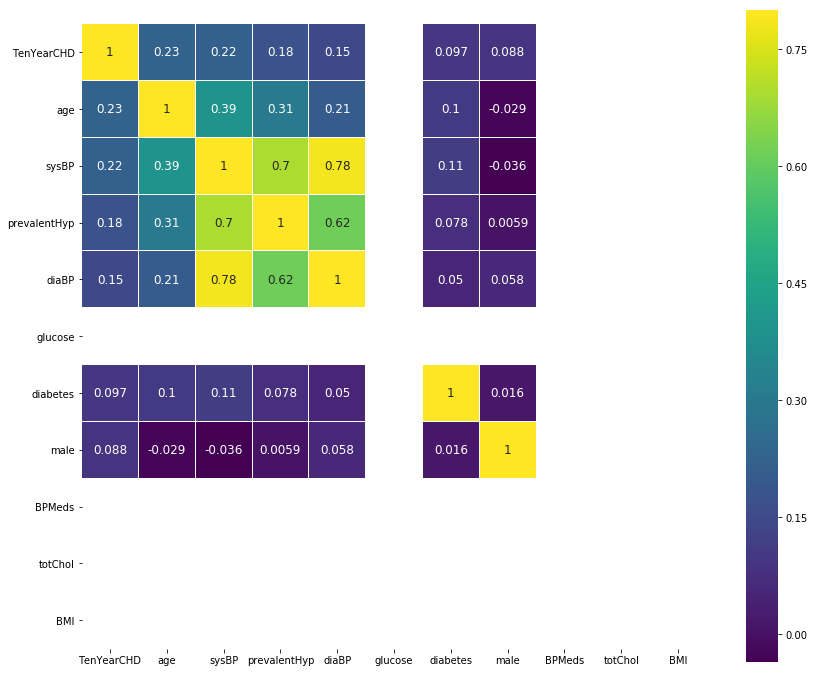

In [7]:
k= 11
cols = correlation.nlargest(k,'TenYearCHD')['TenYearCHD'].index
print(cols)
cm = np.corrcoef(df_fr[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

### Printing pair plot

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/root/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/root/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


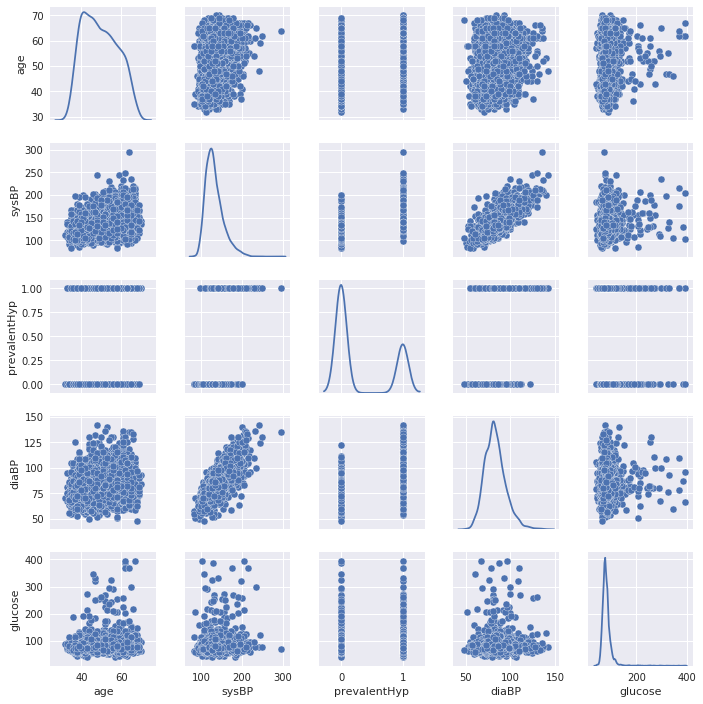

In [8]:
df_fr.columns
sns.set()
columns = ['age','sysBP','prevalentHyp', 'diaBP','glucose']
sns.pairplot(df_fr[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

### Training set and test set split

In [9]:
data_calc = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','diabetes','prevalentHyp','sysBP','prevalentHyp', 'diaBP','glucose','heartRate','totChol','BMI']
target = ['TenYearCHD']

In [13]:
df_fr = df_fr.dropna()

In [14]:
from sklearn.model_selection import train_test_split
train1_X, test1_x, train1_Y, test1_y = train_test_split(df_fr[data_calc], df_fr[target],
                                                                      test_size = 0.25, random_state=0)
print(train1_X.shape,'\n')
print(test1_x.shape, '\n')

(2743, 16) 

(915, 16) 



### Defining Models

In [15]:

from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
MLA = [
      
    linear_model.LogisticRegressionCV(),
    
    
]

In [16]:
MLA_columns = ['MLA Name','MLA Accuracy'] 
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = test1_y[target]
from sklearn.feature_selection import RFE

row_index = 0
for alg in MLA:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    
    clf = alg
    clf.fit(train1_X, train1_Y)
    pred = clf.predict(test1_x)
    MLA_compare.loc[row_index, 'MLA Accuracy'] = metrics.accuracy_score(test1_y, pred)*100
    row_index+=1

MLA_compare

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MLA Name,MLA Accuracy
0,LogisticRegressionCV,84.6995


### Variance Inflation Factor

In [17]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train1_X.values, i) for i in range(train1_X.shape[1])]
vif["features"] = train1_X.columns

/root/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [18]:
vif.round(1)

,VIF Factor,features
0,2.200000,male
1,41.500000,age
2,4.700000,education
3,5.000000,currentSmoker
4,4.400000,cigsPerDay
5,1.100000,BPMeds
6,1.000000,prevalentStroke
7,1.500000,diabetes
8,inf,prevalentHyp
9,141.000000,sysBP


### Removing sysBP and rebuilding Model

In [19]:
data_calc = ['male','education','cigsPerDay','BPMeds','prevalentStroke','diabetes','prevalentHyp','prevalentHyp', 'diaBP','heartRate','totChol','BMI']
target = ['TenYearCHD']

In [20]:
from sklearn.model_selection import train_test_split
train1_X, test1_x, train1_Y, test1_y = train_test_split(df_fr[data_calc], df_fr[target],
                                                                      test_size = 0.25, random_state=0)
print(train1_X.shape,'\n')
print(test1_x.shape, '\n')

(2743, 12) 

(915, 12) 



In [21]:
MLA_columns = ['MLA Name', 'MLA Accuracy'] 
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = test1_y[target]

row_index = 0
for alg in MLA:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    
    clf = alg
    clf.fit(train1_X, train1_Y)
    pred = clf.predict(test1_x)
    MLA_compare.loc[row_index, 'MLA Accuracy'] = metrics.accuracy_score(test1_y, pred)*100
    row_index+=1

MLA_compare

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MLA Name,MLA Accuracy
0,LogisticRegressionCV,83.9344
